# **ANOMALY DETECTION IN SOCIAL NETWORK**

---




## **Data Sets used :**



*   facebook : (http://networkrepository.com/socfb-Duke14.php) 


---



## **Mounting Google Drive :**

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **Importing Packages :**

In [ ]:
import pandas as pd
import csv
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols
from sklearn import metrics
from sklearn.metrics import r2_score
import pickle

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



---

##**Importing Datasets :**

In [ ]:
import pickle

filename = '/content/gdrive/My Drive/Project/Models/graphobjectfb.sav'
G = pickle.load(open(filename, 'rb'))

filename = '/content/gdrive/My Drive/Project/Models/egonet.sav'
ego_g = pickle.load(open(filename, 'rb'))

ddd=pd.read_csv('/content/gdrive/My Drive/Project/Dataset/final_dataset1.csv')
print(ddd)

df=pd.read_csv('/content/gdrive/My Drive/Project/Dataset/train_dataset.csv')
print(df)

dft=pd.read_csv('/content/gdrive/My Drive/Project/Dataset/test_dataset.csv')
print(dft)

      nodes_name  nodes  betweenness  closeness  brokerage  edges
0              1      5     0.200000   0.250000          1      9
1              2    133    48.954887   0.007576       6511   2267
2              3    245    97.877551   0.004098      23980   5910
3              4     38     8.263158   0.027027        314    389
4              5    227    96.312775   0.004425      21863   3788
...          ...    ...          ...        ...        ...    ...
9880        9881    208    91.817308   0.004831      19098   2430
9881        9882    189    74.645503   0.005319      14108   3658
9882        9883     25     7.160000   0.041667        179    121
9883        9884    113    38.840708   0.008929       4389   1939
9884        9885     54    17.148148   0.018868        926    505

[9885 rows x 6 columns]
      betweenness  closeness  brokerage  edges
0       56.507246   0.007299       7798   1655
1        8.423077   0.040000        219    106
2      121.423611   0.003484      34970   

In [ ]:
X1_test=list (dft['betweenness'])
X2_test=list (dft['closeness'])
X3_test=list (dft['brokerage'])
y1_test=list (dft['edges'])
print(y1_test)
print(nx.info(G))
print(nx.info(ego_g['1']))
node_names=list (G)


[32, 45, 2291, 240, 62, 3120, 1950, 78, 3812, 525, 1235, 5, 120, 1130, 96, 239, 1643, 830, 511, 2251, 28, 2565, 4735, 3725, 1851, 1021, 788, 3726, 2187, 13, 654, 1029, 1399, 1109, 59, 1019, 1541, 295, 15, 300, 5219, 1, 1951, 361, 704, 260, 1841, 11, 6524, 811, 2913, 654, 9383, 1120, 2163, 7966, 1183, 1, 3659, 736, 518, 2620, 1389, 1744, 30, 609, 1504, 46, 126, 1376, 14, 466, 526, 194, 3652, 8240, 55, 1235, 1, 11562, 1235, 659, 14, 4676, 4, 13889, 1979, 7343, 448, 4004, 3758, 3211, 223, 1, 896, 3218, 320, 550, 303, 3057, 71, 312, 8843, 1951, 1492, 30, 2875, 2713, 864, 758, 25, 244, 1644, 2733, 3741, 1918, 43, 84, 6, 2158, 15, 4389, 3787, 554, 289, 5, 3158, 445, 9238, 6316, 1, 2197, 648, 1951, 452, 880, 5187, 1, 162, 160, 1165, 1189, 3455, 480, 178, 724, 3316, 445, 1099, 3365, 115, 3734, 55, 3516, 5, 4, 194, 4, 15712, 32, 211, 1520, 3744, 2024, 418, 1134, 465, 1034, 3162, 1449, 1171, 1449, 63, 2147, 1468, 6, 15, 873, 3461, 2235, 31, 134, 641, 1493, 336, 367, 6788, 87, 7241, 479, 428, 156

## **Power Law Fitting :**

---



https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

### **Power Law (Betweenness):**


---



In [ ]:
df=df.sort_values(by = 'betweenness',ascending=True)
df=df.reset_index(drop=True)
df = df[df.betweenness != 0]
df=df.reset_index(drop=True)
print (df)

      betweenness  closeness  brokerage  edges
0        0.090909   0.100000          1     54
1        0.125000   0.142857          1     27
2        0.125000   0.142857          1     27
3        0.142857   0.166667          1     20
4        0.166667   0.200000          1     14
...           ...        ...        ...    ...
7568   339.853425   0.001372     248093  17992
7569   347.169421   0.001379     252045  11130
7570   355.976532   0.001305     273034  20727
7571   374.654791   0.001230     304969  25922
7572   920.264301   0.000530    1737459  43869

[7573 rows x 4 columns]


[-2.3978952727983702, -2.0794415416798357, -2.0794415416798357, -1.9459101490553135, -1.791759469228055, -1.791759469228055, -1.791759469228055, -1.791759469228055, -1.704748092238425, -1.6094379124341003, -1.6094379124341003, -1.6094379124341003, -1.6094379124341003, -1.6094379124341003, -1.6094379124341003, -1.6094379124341003, -1.6094379124341003, -1.6094379124341003, -1.5040773967762742, -1.3862943611198908, -1.3862943611198906, -1.3862943611198906, -1.3862943611198906, -1.3862943611198906, -1.3862943611198906, -1.3862943611198906, -1.3862943611198906, -1.3862943611198906, -1.3862943611198906, -1.3862943611198906, -1.3862943611198906, -1.3862943611198906, -1.3862943611198906, -1.3862943611198906, -1.3862943611198906, -1.3862943611198906, -1.3862943611198906, -1.3862943611198906, -1.3862943611198906, -1.3862943611198906, -1.252762968495368, -1.252762968495368, -1.0986122886681098, -1.0986122886681098, -1.0986122886681098, -1.0986122886681098, -1.0986122886681098, -1.0986122886681098

Text(0, 0.5, 'No. of Edges')

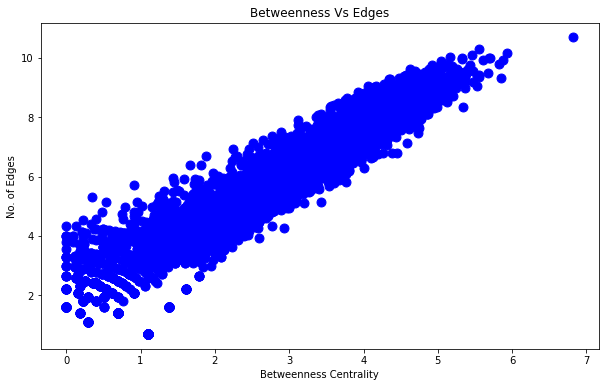

In [ ]:

log_edges=np.log(df[['edges']])
log_betweenness=np.log(df[['betweenness']])


o=log_betweenness['betweenness'].tolist()
print(o)
p=[]
for i in o :
  if (i<0):
    p.append(-i)
  else:
    p.append(i)
log_betweenness=pd.DataFrame(p, columns =['betweenness'])

fig,a=plt.subplots(figsize=(10,6))
a.scatter(log_betweenness,log_edges,s=80,color='blue')
plt.title("Betweenness Vs Edges")
plt.xlabel("Betweenness Centrality")
plt.ylabel("No. of Edges")

In [ ]:
import pickle
r1=[]
u1=[]
for i in range (3): 
  dflog=np.log(df[['edges','betweenness']])
  model1=ols('edges ~ betweenness', data=dflog).fit()
  r1.append(model1.rsquared)
  u1.append(list (model1.params))
  
m1= max(r1)
for i in range(len(r1)):
  if (r1[i]==m1):
    c1= u1[i][0]
    q1= u1[i][1]
print (m1,c1,q1)
print (model1.summary())
filename = '/content/gdrive/My Drive/Project/Models/finalized_model1fb.sav'
pickle.dump(model1, open(filename, 'wb'))

0.9117814993071116 2.2341546450270693 1.313266462722242
                            OLS Regression Results                            
Dep. Variable:                  edges   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 7.825e+04
Date:                Fri, 28 May 2021   Prob (F-statistic):               0.00
Time:                        18:29:12   Log-Likelihood:                -6161.1
No. Observations:                7573   AIC:                         1.233e+04
Df Residuals:                    7571   BIC:                         1.234e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [ ]:
c1,q1=model1.params
print(c1,q1)
c1=2.71828 ** c1
print(c1)
print(model1.rsquared)

#e^(-1.2870)
#edges_hat = 0.2760978354 * df[['betweeness']]**(-1.5092)
edges_hat1 = c1 * (df[['betweenness']]**q1)
df.insert(loc =1,value =edges_hat1,column='edges_hat1')
print(df)

2.2341546450270693 1.313266462722242
9.33857006184872
0.9117814993071116
      betweenness    edges_hat1  closeness  brokerage  edges
0        0.090909      0.400548   0.100000          1     54
1        0.125000      0.608531   0.142857          1     27
2        0.125000      0.608531   0.142857          1     27
3        0.142857      0.725173   0.166667          1     20
4        0.166667      0.887893   0.200000          1     14
...           ...           ...        ...        ...    ...
7568   339.853425  19703.383641   0.001372     248093  17992
7569   347.169421  20262.278742   0.001379     252045  11130
7570   355.976532  20939.991249   0.001305     273034  20727
7571   374.654791  22394.637813   0.001230     304969  25922
7572   920.264301  72893.258506   0.000530    1737459  43869

[7573 rows x 5 columns]


Text(0, 0.5, 'No. of Edges')

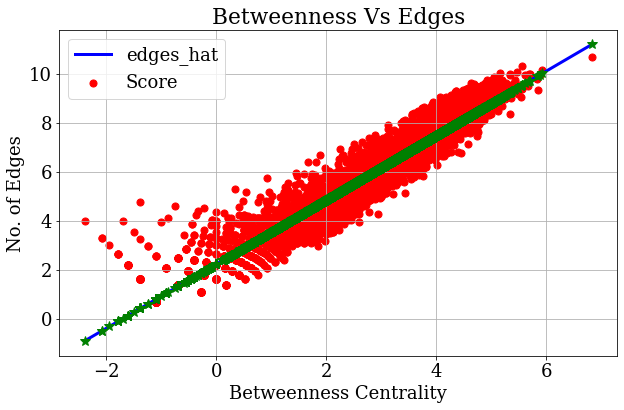

In [ ]:
log_edges=np.log(df[['edges']])
log_betweenness=(np.log(df[['betweenness']]))
log_edgeshat1=np.log(df[['edges_hat1']])

matplotlib.rcParams.update({'font.size':18,"font.family":'serif'})

fig , me=plt.subplots(figsize=(10,6))

me.scatter(log_betweenness,log_edges,s=50,color='red',label='Score')
me.plot(log_betweenness,log_edgeshat1,lw=3,label='edges_hat',color='blue')
me.plot(log_betweenness,log_edgeshat1, r'g*', markersize=10)
me.legend(loc=0)
me.grid(True)
plt.title("Betweenness Vs Edges")
plt.xlabel("Betweenness Centrality")
plt.ylabel("No. of Edges")

### **Power Law (Closeness):**


---



In [ ]:
df=df.sort_values(by = 'closeness',ascending=True)
df=df.reset_index(drop=True)
df = df[df.closeness != 0]
df=df.reset_index(drop=True)
print (df)

      betweenness    edges_hat1  closeness  brokerage  edges
0      920.264301  72893.258506   0.000530    1737459  43869
1      374.654791  22394.637813   0.001230     304969  25922
2      355.976532  20939.991249   0.001305     273034  20727
3      339.853425  19703.383641   0.001372     248093  17992
4      347.169421  20262.278742   0.001379     252045  11130
...           ...           ...        ...        ...    ...
7568     0.333333      2.206445   0.500000          1      2
7569     0.333333      2.206445   0.500000          1      2
7570     0.333333      2.206445   0.500000          1      2
7571     0.333333      2.206445   0.500000          1      2
7572     0.333333      2.206445   0.500000          1      2

[7573 rows x 5 columns]


Text(0, 0.5, 'No. of Edges')

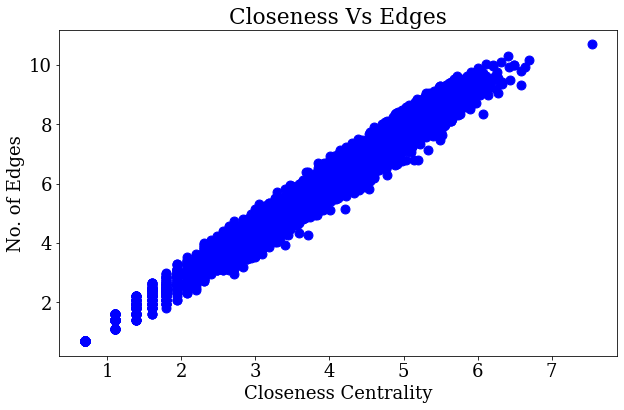

In [ ]:
log_edges=np.log(df[['edges']])
log_closeness=-(np.log(df[['closeness']]))
fig , a=plt.subplots(figsize=(10,6))
a.scatter(log_closeness,log_edges,s=80,color='blue')
plt.title("Closeness Vs Edges")
plt.xlabel("Closeness Centrality")
plt.ylabel("No. of Edges")

In [ ]:
r2=[]
u2=[]
for i in range (3): 
  dflog=np.log(df[['edges','closeness']])
  model2=ols('edges ~ closeness', data=dflog).fit()
  r2.append(model2.rsquared)
  u2.append(list (model2.params))
  
m2= max(r2)
for i in range(len(r2)):
  if (r2[i]==m2):
    c2= u2[i][0]
    q2= u2[i][1]
print (m2,c2,q2)
print (model2.summary())
filename = '/content/gdrive/My Drive/Project/Models/finalized_model2fb.sav'
pickle.dump(model2, open(filename, 'wb'))

0.9727895613697549 -0.5124309601358652 -1.6357389276406868
                            OLS Regression Results                            
Dep. Variable:                  edges   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 2.707e+05
Date:                Fri, 28 May 2021   Prob (F-statistic):               0.00
Time:                        18:29:13   Log-Likelihood:                -1707.3
No. Observations:                7573   AIC:                             3419.
Df Residuals:                    7571   BIC:                             3433.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [ ]:
c2,q2=model2.params
print(c2,q2)
c2=2.71828 ** c2
print(c2)
print(model2.rsquared)

#e^(-1.2870)
#edges_hat = 0.2760978354 * df[['betweeness']]**(-1.5092)
edges_hat2 = c2 * (df[['closeness']]**q2)
df.insert(loc =1,value =edges_hat2,column='edges_hat2')
print(df)

-0.5124309601358652 -1.6357389276406868
0.599037777377132
0.9727895613697549
      betweenness     edges_hat2    edges_hat1  closeness  brokerage  edges
0      920.264301  136697.894865  72893.258506   0.000530    1737459  43869
1      374.654791   34482.806073  22394.637813   0.001230     304969  25922
2      355.976532   31282.358303  20939.991249   0.001305     273034  20727
3      339.853425   28848.887403  19703.383641   0.001372     248093  17992
4      347.169421   28590.413392  20262.278742   0.001379     252045  11130
...           ...            ...           ...        ...        ...    ...
7568     0.333333       1.861490      2.206445   0.500000          1      2
7569     0.333333       1.861490      2.206445   0.500000          1      2
7570     0.333333       1.861490      2.206445   0.500000          1      2
7571     0.333333       1.861490      2.206445   0.500000          1      2
7572     0.333333       1.861490      2.206445   0.500000          1      2

[7573 rows

Text(0, 0.5, 'No. of Edges')

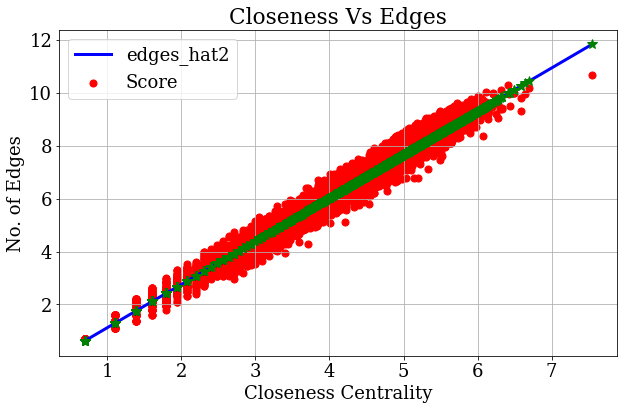

In [ ]:
log_edges=np.log(df[['edges']])
log_closeness=-(np.log(df[['closeness']]))
log_edgeshat2=np.log(df[['edges_hat2']])

matplotlib.rcParams.update({'font.size':18,"font.family":'serif'})

fig , me=plt.subplots(figsize=(10,6))

me.scatter(log_closeness,log_edges,s=50,color='red',label='Score')
me.plot(log_closeness,log_edgeshat2,lw=3,label='edges_hat2',color='blue')
me.plot(log_closeness,log_edgeshat2, r'g*', markersize=10)
me.legend(loc=0)
me.grid(True)
plt.title("Closeness Vs Edges")
plt.xlabel("Closeness Centrality")
plt.ylabel("No. of Edges")

### **Power Law (Brokerage):**


---

In [ ]:
df=df.sort_values(by = 'brokerage',ascending=True)
df=df.reset_index(drop=True)
df = df[df.brokerage != 0]
df=df.reset_index(drop=True)
print (df)

      betweenness     edges_hat2    edges_hat1  closeness  brokerage  edges
0        0.333333       1.861490      2.206445   0.500000          1      2
1        0.250000       3.613267      1.512221   0.333333          1      5
2        0.250000       3.613267      1.512221   0.333333          1      5
3        0.250000       3.613267      1.512221   0.333333          1      5
4        0.250000       3.613267      1.512221   0.333333          1      5
...           ...            ...           ...        ...        ...    ...
7568   339.853425   28848.887403  19703.383641   0.001372     248093  17992
7569   347.169421   28590.413392  20262.278742   0.001379     252045  11130
7570   355.976532   31282.358303  20939.991249   0.001305     273034  20727
7571   374.654791   34482.806073  22394.637813   0.001230     304969  25922
7572   920.264301  136697.894865  72893.258506   0.000530    1737459  43869

[7573 rows x 6 columns]


Text(0, 0.5, 'No. of Edges')

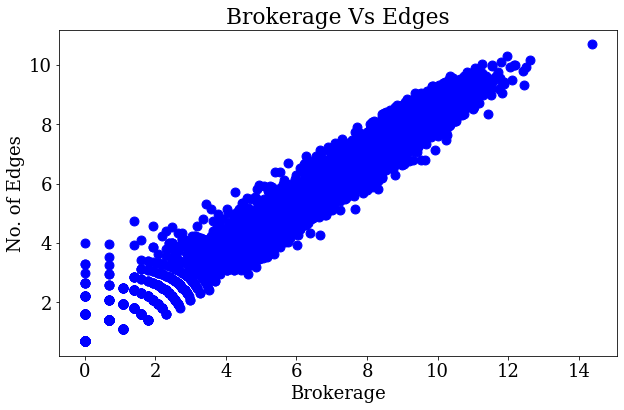

In [ ]:
log_edges=np.log(df[['edges']])
log_brokerage=np.log(df[['brokerage']])
fig , a=plt.subplots(figsize=(10,6))
a.scatter(log_brokerage,log_edges,s=80,color='blue')
plt.title("Brokerage Vs Edges")
plt.xlabel("Brokerage")
plt.ylabel("No. of Edges")

In [ ]:
r3=[]
u3=[]
for i in range (3): 
  dflog=np.log(df[['edges','brokerage']])
  model3=ols('edges ~ brokerage', data=dflog).fit()
  r3.append(model3.rsquared)
  u3.append(list (model3.params))
  
m3= max(r3)
for i in range(len(r3)):
  if (r3[i]==m3):
    c3= u3[i][0]
    q3= u3[i][1]
print (m3,c3,q3)
print (model3.summary())
filename = '/content/gdrive/My Drive/Project/Models/finalized_model3fb.sav'
pickle.dump(model3, open(filename, 'wb'))

0.9453076666476323 0.8480673174001363 0.7474301714928558
                            OLS Regression Results                            
Dep. Variable:                  edges   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.309e+05
Date:                Fri, 28 May 2021   Prob (F-statistic):               0.00
Time:                        18:29:14   Log-Likelihood:                -4350.8
No. Observations:                7573   AIC:                             8706.
Df Residuals:                    7571   BIC:                             8719.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [ ]:
c3,q3=model3.params
print(c3,q3)
c3=2.71828 ** c3
print(c3)
print(model3.rsquared)

#e^(-1.2870)
#edges_hat = 0.2760978354 * df[['betweeness']]**(-1.5092)
edges_hat3 = c3 * (df[['brokerage']]**q3)
df.insert(loc =1,value =edges_hat3,column='edges_hat3')
print(df)

0.8480673174001363 0.7474301714928558
2.3351280918634436
0.9453076666476323
      betweenness     edges_hat3     edges_hat2  ...  closeness  brokerage  edges
0        0.333333       2.335128       1.861490  ...   0.500000          1      2
1        0.250000       2.335128       3.613267  ...   0.333333          1      5
2        0.250000       2.335128       3.613267  ...   0.333333          1      5
3        0.250000       2.335128       3.613267  ...   0.333333          1      5
4        0.250000       2.335128       3.613267  ...   0.333333          1      5
...           ...            ...            ...  ...        ...        ...    ...
7568   339.853425   25142.494128   28848.887403  ...   0.001372     248093  17992
7569   347.169421   25441.247384   28590.413392  ...   0.001379     252045  11130
7570   355.976532   27008.664647   31282.358303  ...   0.001305     273034  20727
7571   374.654791   29336.539494   34482.806073  ...   0.001230     304969  25922
7572   920.264301  107

Text(0, 0.5, 'No. of Edges')

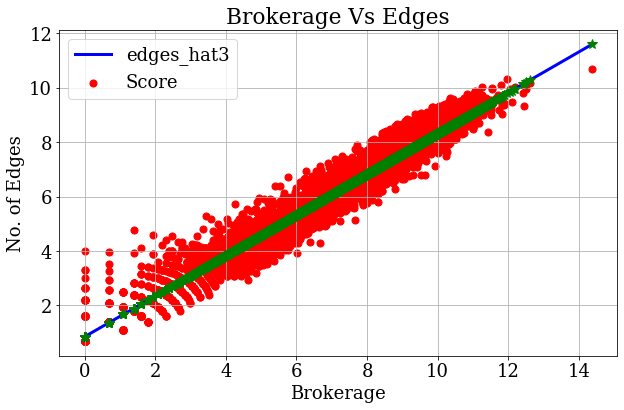

In [ ]:
log_edges=np.log(df[['edges']])
log_brokerage=(np.log(df[['brokerage']]))
log_edgeshat3=np.log(df[['edges_hat3']])

matplotlib.rcParams.update({'font.size':18,"font.family":'serif'})

fig , me=plt.subplots(figsize=(10,6))

me.scatter(log_brokerage,log_edges,s=50,color='red',label='Score')
me.plot(log_brokerage,log_edgeshat3,lw=3,label='edges_hat3',color='blue')
me.plot(log_brokerage,log_edgeshat3, r'g*', markersize=10)
me.legend(loc=0)
me.grid(True)
plt.title("Brokerage Vs Edges")
plt.xlabel("Brokerage")
plt.ylabel("No. of Edges")

## **Anomaly Score Calculation:**

In [ ]:
node_names=dict (ddd['nodes_name'])
xx1=dict (ddd['betweenness'])
xx2=dict (ddd['closeness'])
xx3=dict (ddd['brokerage'])
yx=dict (ddd['edges'])
x1={}
x2={}
x3={}
y={}
for i in node_names:
  j=str (i+1)
  x1[j]=xx1[i]
  x2[j]=xx2[i]
  x3[j]=xx3[i]
  y[j]=yx[i]

print(x1)
print(x2)
print(x3)
print(y)

node_names=list (G.nodes)  

for i in node_names:
  k=ego_g[i].degree(i)
  if (k==1):
    x2[i]=0


{'1': 0.2, '2': 48.95488721804512, '3': 97.87755102040813, '4': 8.263157894736842, '5': 96.31277533039645, '6': 14.217391304347831, '7': 14.799999999999995, '8': 21.564516129032253, '9': 157.5345744680851, '10': 60.17514124293782, '11': 13.542857142857141, '12': 26.211267605633804, '13': 6.000000000000001, '14': 56.44360902255637, '15': 12.117647058823529, '16': 56.91724137931035, '17': 3.8571428571428568, '18': 58.45833333333332, '19': 15.342105263157892, '20': 5.476190476190476, '21': 31.14102564102564, '22': 36.390804597701155, '23': 3.692307692307692, '24': 134.00321543408353, '25': 17.624999999999996, '26': 215.76754385964853, '27': 6.958333333333332, '28': 11.468750000000002, '29': 36.217391304347814, '30': 63.027210884353714, '31': 69.17816091954025, '32': 48.78294573643411, '33': 6.25, '34': 26.59154929577465, '35': 60.99999999999998, '36': 26.77464788732396, '37': 18.119402985074625, '38': 12.000000000000002, '39': 73.81666666666672, '40': 9.7, '41': 110.42084942084948, '42': 

In [ ]:
#x-betweenness
#y-edges
def power1(x):
    return (c1 * (x**q1))
    #return 0.2760978354 * x**(-1.5092)

def power2(x):
    return (c2 * (x**q2))

def power3(x):
    return (c3 * (x**q3))

def mod(x):
  if (x>=0):
    return (x)
  else:
    return (-x)

ascore1={}
ascore2={}
ascore3={}

for i in node_names :
  if (x1[i]==0):
    ascore1[i]=10000
  else : 
    ascore1[i]=( max( y[i],power1(x1[i]) ) / min( y[i],power1(x1[i]) ) ) * np.log( mod( y[i] - power1(x1[i])) + 1)

for i in node_names :
  if (x2[i]==0):
    ascore2[i]=10000
  else :  
    ascore2[i]=( max( y[i],power2(x2[i]) ) / min( y[i],power2(x2[i]) ) ) * np.log( mod( y[i] - power2(x2[i])) + 1) 

for i in node_names :
  if (x3[i]==0):
    ascore3[i]=10000
  else : 
    ascore3[i]=( max( y[i],power3(x3[i]) ) / min( y[i],power3(x3[i]) ) ) * np.log( mod( y[i] - power3(x3[i])) + 1) 


print(ascore1)
print(ascore2)
print(ascore3)

dd = pd.DataFrame.from_dict(ascore3,orient='index', columns=['ascore'])
print(dd)

{'1': 17.415169445119744, '2': 9.645071546383148, '3': 11.743664642643033, '4': 14.26255126817415, '5': 3.329431024825819, '6': 5.427622853191637, '7': 8.381187499365584, '8': 3.5015616128110802, '9': 13.053123133107526, '10': 19.356496102119003, '11': 12.088517888860036, '12': 4.43079366801025, '13': 12.068844020418403, '14': 9.372267091295788, '15': 15.992746569612933, '16': 6.62684965822594, '17': 4.373687401936115, '18': 4.497800635238841, '19': 15.122954949376245, '20': 2.3818797089881314, '21': 8.387776983515469, '22': 11.226557267310337, '23': 5.419582985428268, '24': 7.412277125833607, '25': 6.904700048144803, '26': 17.466666407273053, '27': 2.656348808755532, '28': 8.245496212068689, '29': 6.386186247535461, '30': 9.611888278737654, '31': 7.871497712370391, '32': 7.714133114964384, '33': 5.866333258837741, '34': 5.3295837068494425, '35': 8.279475154574996, '36': 5.712950134912137, '37': 15.123190869886846, '38': 8.742699706829443, '39': 5.474789483091046, '40': 4.7778412142413

## **Labeling Nodes :**

741 9144


<BarContainer object of 2 artists>

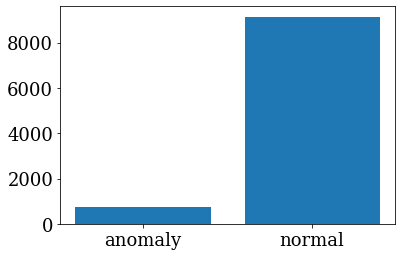

In [ ]:
k={}
ca=0
cn=0
node_names= list (G.nodes)
for i in node_names :
    n=ego_g[i].number_of_nodes()
    e=ego_g[i].number_of_edges()
    d=ego_g[i].degree(i)
    m=(n*(n-1))/2
    if((e>=n-1 and e<=n+1) or (e<=m and e>=m-2)):
        k[i]=1
        ca=ca+1
    else :
        k[i]=0
        cn=cn+1

nx.set_node_attributes(G, k,"result")
t={"anomaly":ca,"normal":cn}

d=nx.get_node_attributes(G, "result")

keys = t.keys()
values =t.values()
print(ca,cn)
plt.bar(keys, values)

## **Threshold Setting :**

---



In [ ]:
ascorelist1 = sorted(ascore1.items(), key=lambda x:x[1])
sortdict1 = dict(ascorelist1)
print(sortdict1)
res1=list (sortdict1.values())

ascorelist2 = sorted(ascore2.items(), key=lambda x:x[1])
sortdict2 = dict(ascorelist2)
print(sortdict2)
res2=list (sortdict2.values())

ascorelist3 = sorted(ascore3.items(), key=lambda x:x[1])
sortdict3 = dict(ascorelist3)
print(sortdict3)
res3=list (sortdict3.values())

tis1 = []
tis2 = []
tis3 = []
tis1 = list(set(res1))
tis2 = list(set(res2))
tis3 = list(set(res3))


{'4965': 0.033385872260430785, '8004': 0.09124724826661622, '5700': 0.09124724826661787, '609': 0.09124724826662116, '6801': 0.09603626050121737, '6907': 0.09603626050121737, '2307': 0.09603626050122388, '5159': 0.11319698856310742, '5129': 0.13130250442793612, '5553': 0.19566269967793917, '1983': 0.19566269967812633, '121': 0.20705026788852485, '156': 0.20705026788852485, '309': 0.20705026788852485, '753': 0.20705026788852485, '1184': 0.20705026788852485, '1526': 0.20705026788852485, '2222': 0.20705026788852485, '2285': 0.20705026788852485, '2415': 0.20705026788852485, '2503': 0.20705026788852485, '2571': 0.20705026788852485, '2654': 0.20705026788852485, '2896': 0.20705026788852485, '2952': 0.20705026788852485, '3025': 0.20705026788852485, '3043': 0.20705026788852485, '3172': 0.20705026788852485, '3633': 0.20705026788852485, '3869': 0.20705026788852485, '3872': 0.20705026788852485, '3942': 0.20705026788852485, '3959': 0.20705026788852485, '4089': 0.20705026788852485, '4437': 0.2070502

In [ ]:
y_pred = []
y_act = []

node_names= list (G.nodes)
for i in node_names :
    n=ego_g[i].number_of_nodes()
    e=ego_g[i].number_of_edges()
    d=ego_g[i].degree(i)
    m=(n*(n - 1)) / 2
    if ( (e>=n-1 and e<=n+1) or (e<=m and e>=m-2)):
        y_act.append(1)
    else :
        y_act.append(0)

f1={}
thresh1=0        
for thresh1 in tis1 :
  y_pred = []
  for i in ascore1 :
    if (ascore1[i]>thresh1) :
      y_pred.append(1)
    else :
      y_pred.append(0)
  f1[thresh1]=metrics.f1_score(y_act, y_pred)

ascorelist1 = sorted(f1.items(), key=lambda x:x[1])
sortdict1 = dict(ascorelist1)
print(sortdict1)
Keymax1 = max(sortdict1, key=sortdict1.get)
thresh1=Keymax1
print(thresh1)

f2={}
thresh2=0        
for thresh2 in tis2 :
  y_pred = []
  for i in ascore2 :
    if (ascore2[i]>thresh2) :
      y_pred.append(1)
    else :
      y_pred.append(0)
  f2[thresh2]=metrics.f1_score(y_act, y_pred)

ascorelist2 = sorted(f2.items(), key=lambda x:x[1])
sortdict2 = dict(ascorelist2)
print(sortdict2)
Keymax2 = max(sortdict2, key=sortdict2.get)
thresh2=Keymax2
print(thresh2)

f3={}
thresh3=0        
for thresh3 in tis3 :
  y_pred = []
  for i in ascore3 :
    if (ascore3[i]>thresh3) :
      y_pred.append(1)
    else :
      y_pred.append(0)
  f3[thresh3]=metrics.f1_score(y_act, y_pred)

ascorelist3 = sorted(f3.items(), key=lambda x:x[1])
sortdict3 = dict(ascorelist3)
print(sortdict3)
Keymax3 = max(sortdict3, key=sortdict3.get)
thresh3=Keymax3
print(thresh3)


{10000: 0.0, 3.1610816692871646: 0.1111111111111111, 3.1621876688345516: 0.11112248030287528, 3.1665395294715477: 0.1111338518215309, 3.1677160555696604: 0.11114522566779245, 3.16825812466321: 0.11115660184237462, 3.1682748914488412: 0.11116798034599243, 3.1689151582747526: 0.11121351766513056, 3.1699586996611737: 0.11122490782466204, 3.1722249354551395: 0.11123630031752535, 3.1735919763266636: 0.11125909230611618, 3.1746405346144906: 0.11127049180327868, 3.1764058487225055: 0.11128189363664309, 3.1828997286086707: 0.11129329780692764, 3.183519066444408: 0.11130470431485087, 3.1854560046138283: 0.11131611316113163, 3.189187546139355: 0.11132752434648899, 3.1892420279345264: 0.11133893787164241, 3.192453925897098: 0.1113503537373116, 3.195955992498965: 0.11136177194421658, 3.2025635112204207: 0.11137319249307763, 3.203033739901457: 0.11138461538461539, 3.203043841571973: 0.11140746819860485, 3.205955277243445: 0.11141889812249924, 3.20613448250695: 0.11147608293984806, 3.207561231755963

## **F-Score calculation:**

accuracy: (tp + tn) / (p + n)

precision(pe): tp / (tp + fp)

recall(re): tp / (tp + fn)

f-score(f1): 2 tp / (2 tp + fp + fn) : 2(pe * re) / ( pe + re )


In [ ]:
tp=0
tn=0
fp=0
fn=0

y_act = []

aa=0
an=0
node_names= list (G.nodes)
for i in node_names :
    n=ego_g[i].number_of_nodes()
    e=ego_g[i].number_of_edges()
    d=ego_g[i].degree(i)
    m=(n*(n - 1)) / 2
    if ((e>=n-1 and e<=n+1) or (e<=m and e>=m-2)):
        y_act.append(1)
        aa=aa+1
    else :
        y_act.append(0)
        an=an+1

pa1=0
pn1=0
yanomaly1={}
y_pred = []
for i in ascore1 :
  if (ascore1[i]>thresh1) :
    pa1=pa1+1
    y_pred.append(1)
    yanomaly1[i]="anomaly"
  else :
    pn1=pn1+1
    y_pred.append(0)
    yanomaly1[i]="normal"

print("Threshold=",thresh1)
print(pa1,pn1,aa,an)
print(metrics.confusion_matrix(y_act, y_pred ))
print(metrics.classification_report(y_act, y_pred ))
print("F-score=",metrics.f1_score(y_act, y_pred))

pa2=0
pn2=0
yanomaly2={}
y_pred = []
for i in ascore2 :
  if (ascore2[i]>thresh2) :
    pa2=pa2+1
    y_pred.append(1)
    yanomaly2[i]="anomaly"
  else :
    pn2=pn2+1
    y_pred.append(0)
    yanomaly2[i]="normal"

print("Threshold=",thresh2)
print(pa2,pn2,aa,an)
print(metrics.confusion_matrix(y_act, y_pred ))
print(metrics.classification_report(y_act, y_pred ))
print("F-score=",metrics.f1_score(y_act, y_pred))

pa3=0
pn3=0
yanomaly3={}
y_pred = []
for i in ascore3 :
  if (ascore3[i]>thresh3) :
    pa3=pa3+1
    y_pred.append(1)
    yanomaly3[i]="anomaly"
  else :
    pn3=pn3+1
    y_pred.append(0)
    yanomaly3[i]="normal"

print("Threshold=",thresh3)
print(pa3,pn3,aa,an)
cm=metrics.confusion_matrix(y_act, y_pred )
print(cm)
print(metrics.classification_report(y_act, y_pred ))
print("F-score=",metrics.f1_score(y_act, y_pred))


Threshold= 80.4626587925384
424 9461 741 9144
[[9141    3]
 [ 320  421]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      9144
           1       0.99      0.57      0.72       741

    accuracy                           0.97      9885
   macro avg       0.98      0.78      0.85      9885
weighted avg       0.97      0.97      0.96      9885

F-score= 0.7227467811158799
Threshold= 35.64298599254058
260 9625 741 9144
[[9144    0]
 [ 481  260]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      9144
           1       1.00      0.35      0.52       741

    accuracy                           0.95      9885
   macro avg       0.98      0.68      0.75      9885
weighted avg       0.95      0.95      0.94      9885

F-score= 0.5194805194805194
Threshold= 34.11170970241507
421 9464 741 9144
[[9142    2]
 [ 322  419]]
              precision    recall  f1-score   support

           0  

## **Anomalous Nodes :**

---



In [ ]:
print("Total anomaly nodes :",pa1,pa2,pa3)
l={}
for i in node_names :
  if (yanomaly3[i]=="anomaly") :
    l[i]=1
  else :
    l[i]=0
for i in node_names :
  if (yanomaly1[i]=="anomaly") :
    l[i]=l[i]+0.8
  else :
    l[i]=l[i]
for i in node_names :
  if (yanomaly2[i]=="anomaly") :
    l[i]=l[i]+0.6
  else :
    l[i]=l[i]

print(l)

c=0 
yanomaly={}
for i in node_names:
  if (l[i]>=1.4):
    yanomaly[i]="anomaly"
    c=c+1
  else:
    yanomaly[i]="normal"


z=[]
y_pred=[]
for i in node_names:
  if (yanomaly[i]=="anomaly"):
    z.append(i)
    y_pred.append(1)
  else:
    y_pred.append(0)

print(z)
print("\nPredicted anomaly nodes=",c)

nx.set_node_attributes(G,yanomaly, "Anomaly")

print("\nConfusion matrix:")
cm=metrics.confusion_matrix(y_act, y_pred )
print(cm)
print(metrics.classification_report(y_act, y_pred ))
print("F-score=",metrics.f1_score(y_act, y_pred))

Total anomaly nodes : 424 260 421
{'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0, '11': 0, '12': 0, '13': 0, '14': 0, '15': 0, '16': 0, '17': 0, '18': 0, '19': 0, '20': 0, '21': 0, '22': 0, '23': 0, '24': 0, '25': 0, '26': 0, '27': 0, '28': 0, '29': 0, '30': 0, '31': 0, '32': 0, '33': 0, '34': 0, '35': 0, '36': 0, '37': 0, '38': 0, '39': 0, '40': 0, '41': 0, '42': 0, '43': 0, '44': 0, '45': 0, '46': 0, '47': 0, '48': 0, '49': 0, '50': 0, '51': 0, '52': 0, '53': 0, '54': 0, '55': 0, '56': 0, '57': 0, '58': 0, '59': 0, '60': 0, '61': 0, '62': 0, '63': 0, '64': 0, '65': 0, '66': 0, '67': 0, '68': 0, '69': 0, '70': 0, '71': 0, '72': 0, '73': 0, '74': 0, '75': 0, '76': 0, '77': 0, '78': 0, '79': 0, '80': 0, '81': 0, '82': 0, '83': 0, '84': 0, '85': 0, '86': 0, '87': 0, '88': 0, '89': 0, '90': 0, '91': 0, '92': 0, '93': 0, '94': 0, '95': 0, '96': 1.8, '97': 0, '98': 0, '99': 0, '100': 0, '101': 0, '102': 0, '103': 2.4, '104': 0, '105': 0, '106': 0, '107': 0,

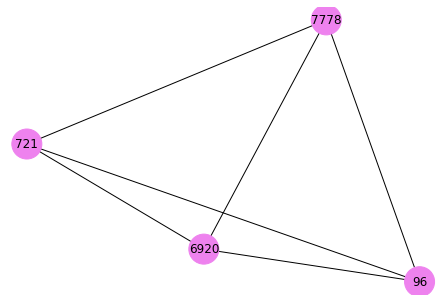

In [ ]:
d = dict(ego_g["96"].degree)
nx.draw(ego_g["96"], node_color='violet', with_labels=True, nodelist=d, node_size=[d[k]*300 for k in d])

In [ ]:
a1=[]
a2=[]
a3=[]
th=[]
for i in z:
  j=str(i)
  a1.append(ascore1[j])
  a2.append(ascore2[j])
  a3.append(ascore3[j])

th=[thresh1,thresh2,thresh3]
print(th)


dan = pd.DataFrame(list (zip(z,a1,a2,a3)),columns =['Anomalous_node','a1','a2','a3'])
dan.to_csv(r'/content/gdrive/My Drive/Project/Dataset/anomalous_node.csv', index = False)

dth = pd.DataFrame(list (th),columns =['Threshold'])
print(dth)
dth.to_csv(r'/content/gdrive/My Drive/Project/Dataset/threshold.csv', index = False)